Source: [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html)

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
#sns.set()

### 1. Simple Linear Regression

A straight-line fit is a model of the form 

$y=ax+b$

where $a$ is known as the slope, and $b$ is known as the intercept.

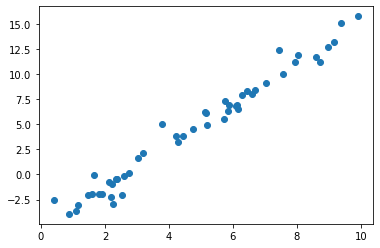

In [3]:
# Instantiate random number generator
rng = np.random.RandomState(1903)

# Generate straight line model with random component
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)

# Plot x, y values
plt.scatter(x, y);

Use Scikit-Learn's `LinearRegression` model to construct the best-fit line.

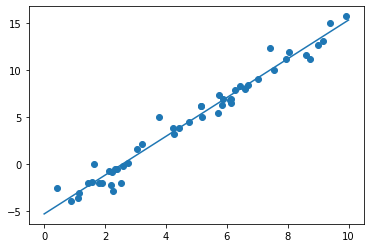

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

# Fit model with original dataset of x values and correponding supervised y values
model.fit(x[:, np.newaxis], y)

# Generate 1000 evenly spaced x values between 0 and 10
xfit = np.linspace(0, 10, 1000)

# Generate corresponding predicted y values using model
yfit = model.predict(xfit[:, np.newaxis])

# Plot original dataset
plt.scatter(x, y)

# Plot predicted value
plt.plot(xfit, yfit);

In [5]:
# The model's predictions is in the form of a line, with gradient i.e. slope and an intercept 

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0665534690985554
Model intercept: -5.322100770425457


### 2. Multiple Linear Regression

The `LinearRegression` model can also handle multi-dimensional linear models with multiple $x$ values (i.e. independent variables) of the form:

$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + a_4x_4$ ...

In a model with 3 different $x$ values (e.g. $y = a_0 + a_1x_1 + a_2x_2 + a_3x_3$), it is similar to fitting a plane to points in a 3 dimensional space.  When the number of $x$ values is more than 3, it becomes fitting a hyper-plane to points in a multi-dimensional space.  In such cases, it is difficult to visualize the multi-dimensional nature of the regression.   

In [6]:
# Initiate random number generator
rng = np.random.RandomState(1903)

# Generates a matrix of 100 rows and 3 columns
X = 10 * rng.rand(100, 3)

# Compute corresponding y values using matrix multiplication
y = 0.5 + np.dot(X, [1.5, -2., 1.])

In [11]:
model.fit(X, y)

# Derive the coefficients and intercept using the regression model
print(model.intercept_)
print(model.coef_)

0.4999999999999938
[ 1.5 -2.   1. ]


### 3. Basis Function Regression

Linear regression can be used to model non-linear relationships between variables by transforming the data according to basis functions.  Building on the concept of multiple linear regression (i.e. $y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + a_4x_4$ ...), we can derive the various $x$ values (i.e. $x_1, x_2, x_3, x_4$...) from a single dimensional $x$ value using
functions that transforms the data such that $x_n = f_n(x)$.

For example, if the transformational function is $f_n(x) = x^n$, the linear regression becomes polynomial (i.e. $y = a_0 + a_1x + a_2x^2 + a_3x^3 + a_4x^4$...). The transformed model is still linear as the coefficients $a_n$ do not multiply or divide each other.

#### 3.1 Polynomial basis function

In [12]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])

poly = PolynomialFeatures(3, include_bias=False)

poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])